<a href="https://colab.research.google.com/github/fnavab/APS360-project/blob/main/dorsa_Baseline_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#baseline
#DORSA
# Support Vector Machines
import random
import torchvision.transforms as transforms
import torch
import numpy as np
import os
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import svm , metrics
#To do: check for the range of gamma and C
#To do: find
# model=svm.SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape='ovr', degree=3, gamma=0.00001, kernel='rbf',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False) 
model=svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False) 
#model = svm.SVC(gamma=0.01, C=100)
# from google.colab import drive
# drive.mount('/content/gdrive')
# clothing_images=torch.load('/content/gdrive/My Drive/aps360/clothing_imgs.pt')

# X = np.array([x.detach().numpy() for x,_ in clothing_images])
# y= np.array([y.detach().numpy() for _,y in clothing_images])

# print(X.shape)
# print(y.shape)
# n_samples = len(clothing_images)
# #print(n_samples)
# X = X.reshape((n_samples, -1))

# #X = X.reshape(X.shape[1]*X.shape[2]*X.shape[3],X.shape[0]).T
# y = y.reshape(y.shape[0],)

# training_data, testing_data, training_labels, testing_labels = train_test_split(
#  X, y, random_state=42)



In [ ]:
#Fereshteh'
#Data loading
#mount googledrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
  train_dir = '/content/gdrive/My Drive/combined_features/train'
   #test_dir = '/content/gdrive/My Drive/Colab Notebooks/1k-features/test'
  # val_dir = '/content/gdrive/My Drive/Colab Notebooks/1k-features/val'
  train_set = torchvision.datasets.DatasetFolder(train_dir, loader=torch.load, extensions=('.tensor'))
  #train_set=shuffle(train_set)
  # val_set= torchvision.datasets.DatasetFolder(val_dir, loader=torch.load, extensions=('.tensor'))
  #test_set = torchvision.datasets.DatasetFolder(test_dir, loader=torch.load, extensions=('.tensor'))

In [ ]:
test_dir = '/content/gdrive/My Drive/combined_features/test'

test_set = torchvision.datasets.DatasetFolder(test_dir, loader=torch.load, extensions=('.tensor'))

In [ ]:
val_dir = '/content/gdrive/My Drive/combined_features/val'
val_set= torchvision.datasets.DatasetFolder(val_dir, loader=torch.load, extensions=('.tensor'))


In [ ]:
len(train_set)
# shuffle(test_set)

12169

In [ ]:
len(val_set)

NameError: ignored

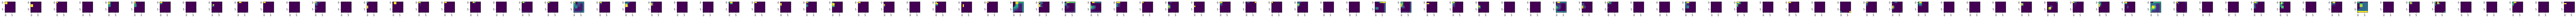

In [ ]:

plt.figure(figsize=(200, 200))
for k in range(100):
  plt.subplot(200, 100, k+1)
  #print(img.shape)
  plt.imshow(train_set[0][0][k])    

In [ ]:
X_test = np.array([x.detach().numpy() for x,_ in test_set])
y_test= np.array([y for _,y in test_set])
n_samples=len(test_set)
X_test = X_test.reshape((n_samples, -1))

# X_test = X.reshape(X.shape[1]*X.shape[2]*X.shape[3],X.shape[0]).T
# y_test = y.reshape(y.shape[0],)

In [ ]:
print(X_test.shape)
print(y_test.shape)
print(y_test[0])
plt.figure(figsize=(200, 200))
# for k in range(100):
# plt.subplot(200, 100, k+1)
# plt.imshow(X_test)



(1600, 16384)
(1600,)
0
[0. 0. 0. ... 0. 0. 0.]


<Figure size 14400x14400 with 0 Axes>

In [ ]:
#2hours
X_train = np.array([x.detach().numpy() for x,_ in train_set])
y_train= np.array([y for _,y in train_set])

n_samples=len(train_set)
X_train = X_train.reshape((n_samples, -1))

# X_train = X_train.reshape(X_train.shape[1]*X_train.shape[2]*X_train.shape[3],X_train.shape[0]).T
# y_train= y_train.reshape(y_train.shape[0],)

In [ ]:
X_val = np.array([x.detach().numpy() for x,_ in val_set])
y_val= np.array([y for _,y in val_set])

n_samples=len(val_set)
X_val = X_val.reshape((n_samples, -1))

# X_val = X_val.reshape(X_val.shape[1]*X_val.shape[2]*X_val.shape[3],X_val.shape[0]).T
# y_val= y_val.reshape(y_val.shape[0],)

In [ ]:
#1hour
# Fit the model to our training data
classifier=model.fit(X_train, y_train)

# Make predictions
testing_predicted = model.predict(X_test)




In [ ]:
#print("testing_data",testing_data)
# f = open("result.txt", "w")

# f.write("testing_lables\n")
# for j in y_test:
#   f.write(str(j))
# f.write("\ntesting_predicted\n")
# for j in testing_predicted:
#   f.write(str(j))

# f.close()
# print("testing_labels",y_test)
# print("testing_predicted",testing_predicted)
#print("Confusion matrix:\n%s" % metrics.confusion_matrix(testing_data,testing_predicted))
def accuracy_score(x,y):
  dictt={'0':0,'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0}
  score=0
  for i in range(len(x)):
    if x[i]==y[i]: 
      score+=1
    # else:
    #   if str(x[i]) in dictt:
    #     dictt[str(x[i])]+=1
      
      # print("model predicted ",x[i])
      # print("true label was ",y[i])
  return score/len(x)
# score=accuracy_score(testing_predicted,y_test)
# print("SVM Test:", score)


In [ ]:
accuracy={"scale, c=1":79.5}

Confusion matrix, without normalization
[[341   8   4   3   7   0  12   5]
 [ 10 308   2   3  10   5  11  25]
 [  2   2 285  63   0  12  15   0]
 [  1   1  39 299   1  15  17   2]
 [ 15  17   0   0 278  11  11  33]
 [  2   2  10  16   1 328  41   2]
 [  6   7   6  14   1  54 268   6]
 [ 11  36   0   2  22   4  12 288]]
Normalized confusion matrix
[[0.9  0.02 0.01 0.01 0.02 0.   0.03 0.01]
 [0.03 0.82 0.01 0.01 0.03 0.01 0.03 0.07]
 [0.01 0.01 0.75 0.17 0.   0.03 0.04 0.  ]
 [0.   0.   0.1  0.8  0.   0.04 0.05 0.01]
 [0.04 0.05 0.   0.   0.76 0.03 0.03 0.09]
 [0.   0.   0.02 0.04 0.   0.82 0.1  0.  ]
 [0.02 0.02 0.02 0.04 0.   0.15 0.74 0.02]
 [0.03 0.1  0.   0.01 0.06 0.01 0.03 0.77]]


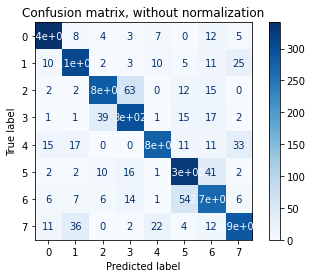

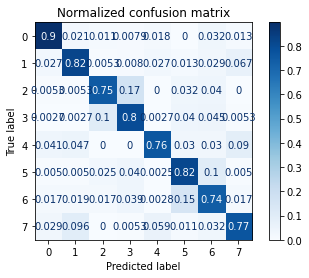

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

class_names=[0,1,2,3,4,5,6,7]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
score=accuracy_score(val_pred,y_val)
print("SVM Test:", score)

model predicted  2
true label was  0
model predicted  1
true label was  0
model predicted  6
true label was  0
model predicted  1
true label was  0
model predicted  1
true label was  0
model predicted  1
true label was  0
model predicted  6
true label was  0
model predicted  0
true label was  1
model predicted  7
true label was  1
model predicted  7
true label was  1
model predicted  7
true label was  1
model predicted  5
true label was  1
model predicted  5
true label was  1
model predicted  5
true label was  1
model predicted  3
true label was  1
model predicted  0
true label was  1
model predicted  4
true label was  1
model predicted  7
true label was  1
model predicted  0
true label was  1
model predicted  7
true label was  1
model predicted  7
true label was  1
model predicted  0
true label was  1
model predicted  7
true label was  1
model predicted  7
true label was  1
model predicted  6
true label was  1
model predicted  2
true label was  1
model predicted  0
true label was  1
m

Confusion matrix, without normalization
[[193   4   1   0   0   0   2   0]
 [  6 180   1   1   1   3   1   9]
 [  0   0 174  22   0   4   1   0]
 [  0   2  28 153   0   6   5   0]
 [  5   9   3   0 165   4   5  11]
 [  0   0   5   6   0 159  11   1]
 [  2   3   1   5   0  25 173   0]
 [  4  13   1   1   5   0   2 184]]
Normalized confusion matrix
[[0.96 0.02 0.01 0.   0.   0.   0.01 0.  ]
 [0.03 0.89 0.   0.   0.   0.01 0.   0.04]
 [0.   0.   0.87 0.11 0.   0.02 0.   0.  ]
 [0.   0.01 0.14 0.79 0.   0.03 0.03 0.  ]
 [0.02 0.04 0.01 0.   0.82 0.02 0.02 0.05]
 [0.   0.   0.03 0.03 0.   0.87 0.06 0.01]
 [0.01 0.01 0.   0.02 0.   0.12 0.83 0.  ]
 [0.02 0.06 0.   0.   0.02 0.   0.01 0.88]]


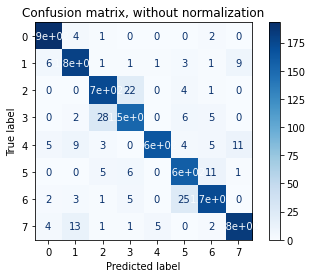

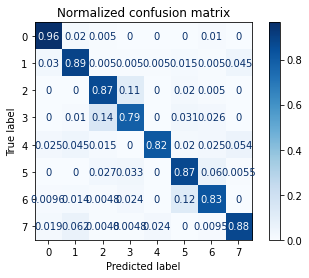

In [ ]:

from sklearn.metrics import plot_confusion_matrix
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
val_pred = model.predict(X_val)
class_names=[0,1,2,3,4,5,6,7]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_val, y_val,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
val_pred = model.predict(X_val)
class_names=[0,1,2,3,4,5,6,7]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_val, y_val,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
model=svm.SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False) 
# Fit the model to our training data
classifier=model.fit(X_train, y_train)

# Make predictions
testing_predicted = model.predict(X_test)
score=accuracy_score(testing_predicted,y_test)
print("SVM Test:", score)


SVM Test: 0.748339973439575


In [ ]:
from sklearn.metrics import plot_confusion_matrix
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#val_pred = model.predict(X_val)
class_names=[0,1,2,3,4,5,6,7]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

NameError: ignored

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

NameError: ignored

In [ ]:
for k in range(0, 10, len(X_test)):
    plt.figure(figsize=(9, 2))
    img = testing_predicted[k]
    plt.subplot(2, 9, k)
    plt.imshow(img)
     